***Part 1:**

In [137]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

food = pd.read_csv("../input/amazon-fine-food-reviews/Reviews.csv")
food = food[:10000]

print(food.shape)
food.head()

['amazon-fine-food-reviews', 'google-play-store-apps']
(10000, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Problem 1**

In [138]:
pb1_group = food[["UserId", "ProfileName", "Score"]].groupby(["UserId", "ProfileName"])
pb1 = pb1_group.size().reset_index(name="Score count")
pb1["Score mean"] = pb1_group.sum()["Score"].values / pb1["Score count"].values
pb1.sort_values(by="Score count", ascending = False).head(10)

,UserId,ProfileName,Score count,Score mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


**Problem 2**

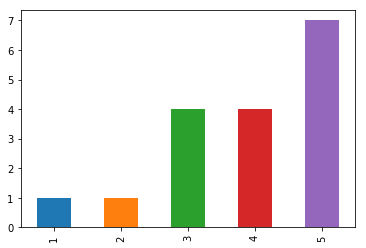

In [139]:
plt.figure()
food[food["UserId"] == "A1Z54EM24Y40LL"]["Score"].value_counts().sort_index().plot(kind="bar")

**Problem 3**

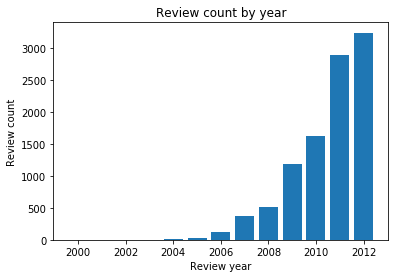

In [140]:
from datetime import datetime
pb3 = food["Time"].apply(datetime.fromtimestamp)
for i in range(pb3.size):
    pb3[i] = pb3[i].year
    
x_ticks = np.linspace(2000, 2012, 7)
plt.figure()
plt.bar(pb3.value_counts().index, pb3.value_counts().values)
plt.xticks(x_ticks)
plt.title("Review count by year")
plt.xlabel("Review year")
plt.ylabel("Review count")
plt.show()

**Problem 4**

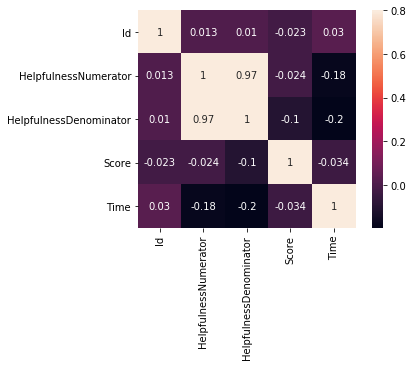

In [141]:
pb4 = food[["Id", "HelpfulnessNumerator", "HelpfulnessDenominator", "Score", "Time"]]
sns.heatmap(pb4.corr(), vmax=0.8, square=True, annot=True)

**Problem 5**

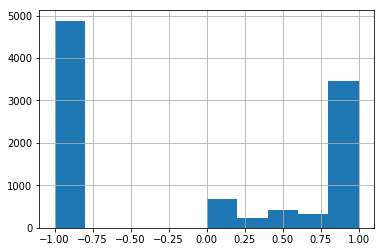

In [142]:
pb5 = food[food["HelpfulnessNumerator"] <= food["HelpfulnessDenominator"]]
for i in range(pb5.index.size):
    if pb5.loc[i,"HelpfulnessNumerator"] == 0 and pb5.loc[i,"HelpfulnessDenominator"] == 0:
        pb5.loc[i,"ratio"] = -1
    else:
        pb5.loc[i,"ratio"] = pb5.loc[i,"HelpfulnessNumerator"] / pb5.loc[i,"HelpfulnessDenominator"]

pb5["ratio"].hist()

***Part 2：**
Link:https://www.kaggle.com/lava18/google-play-store-apps

Context:
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Content:
Each app (row) has values for catergory, rating, size, and more.

In [143]:
store = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")
print(store.shape)
store.sample(20)

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9397,eHub,BUSINESS,4.2,6969,4.8M,"100,000+",Free,0,Everyone,Business,"June 29, 2018",3.9.11,4.4 and up
1422,Lose It! - Calorie Counter,HEALTH_AND_FITNESS,4.4,69395,Varies with device,"10,000,000+",Free,0,Everyone,Health & Fitness,"August 3, 2018",Varies with device,Varies with device
9307,EF Financial Control Free,FINANCE,4.4,58,3.7M,"10,000+",Free,0,Everyone,Finance,"May 6, 2018",1.9.0,4.0.3 and up
3555,New Calendar,PRODUCTIVITY,4.5,25985,6.9M,"1,000,000+",Free,0,Everyone,Productivity,"July 20, 2018",1.0.167,4.0.3 and up
2228,Mad Libs,FAMILY,4.0,8126,61M,"1,000,000+",Free,0,Everyone,Entertainment;Brain Games,"July 31, 2018",1.1.1,6.0 and up
4515,DJMAX TECHNIKA Q - Music Game,GAME,4.3,21107,95M,"100,000+",Free,0,Everyone,Music,"July 30, 2018",1.2.1,4.0.3 and up
10384,Ambulance Simulator 3D,FAMILY,3.9,29415,66M,"1,000,000+",Free,0,Mature 17+,Simulation,"December 11, 2016",2.0.1,2.3 and up
1478,LH Housing Promotion Notice,HOUSE_AND_HOME,NaN,160,3.1M,"100,000+",Free,0,Everyone,House & Home,"September 19, 2017",1.2.0,4.0 and up
2589,Text free - Free Text + Call,SOCIAL,4.3,315441,Varies with device,"10,000,000+",Free,0,Everyone,Social,"July 26, 2018",Varies with device,Varies with device
6167,Block Gun 3D: Call of Destiny,GAME,3.7,31883,20M,"1,000,000+",Free,0,Teen,Action,"March 23, 2017",1.4.3,2.3 and up


**Missing Data:**

In [144]:
print("*Before cleaning data:\n", store.isnull().sum())
store['Rating'].fillna(store['Rating'].median(), inplace = True)

store.dropna(axis = 0, inplace = True)
print("-"*10)
print("*After cleaning data:\n", store.isnull().sum())

*Before cleaning data:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
----------
*After cleaning data:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


處理資料中 ',' '+'，讓其轉為整數或浮點數型態

In [145]:
store['Installs'] = store['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
store['Installs'] = store['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
store['Installs'] = store['Installs'].apply(lambda x: np.NaN if 'Free' in str(x) else x)
store['Installs'] = store['Installs'].apply(lambda x: int(x))

store['Size'] = store['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
store['Size'] = store['Size'].apply(lambda x: float(x.replace('k', '')) / 1000.0 if 'k' in str(x) else x)
store['Size'] = store['Size'].apply(lambda x: np.NaN if 'Varies with device' in str(x) else x)
store['Size'] = store['Size'].apply(lambda x: float(x))
store.dropna(axis = 0, inplace = True)

store['Reviews'] = store['Reviews'].apply(lambda x: int(x))

store['Price'] = store['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
store['Price'] = store['Price'].apply(lambda x: float(x))

store.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1618,Brit + Co,LIFESTYLE,3.9,987,4.5,10000,Free,0.00,Everyone,Lifestyle,"August 29, 2017",2.0.4,4.0 and up
7062,Südtirol2Go,MAPS_AND_NAVIGATION,3.3,555,31.0,50000,Free,0.00,Everyone,Maps & Navigation,"December 20, 2017",2.1.2,4.0 and up
5110,Wind & Weather Meter for Ag,WEATHER,4.3,3,14.0,1000,Free,0.00,Everyone,Weather,"March 14, 2016",v1.0,4.3 and up
5176,Mitchell AH,MEDICAL,4.3,0,29.0,50,Free,0.00,Everyone,Medical,"May 23, 2018",300000.1.08,4.0.3 and up
9123,ONEC DZ,FAMILY,4.3,40,3.1,1000,Free,0.00,Everyone,Education,"June 13, 2018",4.0,4.0.3 and up
10283,Bank FD Interest Calculator,FINANCE,4.5,166,3.5,10000,Free,0.00,Everyone,Finance,"January 7, 2018",2.5,4.0.3 and up
874,Talking Angela,ENTERTAINMENT,3.7,1828284,52.0,100000000,Free,0.00,Everyone,Entertainment,"July 12, 2018",2.8.2,4.1 and up
8476,English for Everyone,FAMILY,3.2,429,18.0,10000,Free,0.00,Everyone,Education,"July 6, 2018",3.9.1,4.4 and up
3959,B-17 Flying Fortress WWII LWP,PERSONALIZATION,4.3,7,14.0,100,Paid,1.49,Everyone,Personalization,"December 22, 2016",1.0,4.1 and up
1180,Sumine side dish - dish recipe side dish,FOOD_AND_DRINK,4.3,82,4.9,10000,Free,0.00,Everyone,Food & Drink,"June 23, 2018",1.1,4.1 and up


In [146]:
store.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9135,9135,9135.000000,9.135000e+03,9135.000000,9.135000e+03,9135,9135.000000,9135,9135,9135,9135,9135
unique,8424,33,NaN,NaN,NaN,NaN,2,NaN,6,116,1357,2712,33
top,ROBLOX,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",1.0,4.1 and up
freq,9,1829,NaN,NaN,NaN,NaN,8414,NaN,7406,737,212,807,2317
mean,NaN,NaN,4.193421,2.493186e+05,21.534957,7.122458e+06,NaN,1.185283,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.502844,1.717130e+06,22.593662,4.621827e+07,NaN,17.365220,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.008500,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,2.200000e+01,4.900000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,7.420000e+02,13.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,2.516900e+04,30.000000,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


App 的 Rating 分布

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


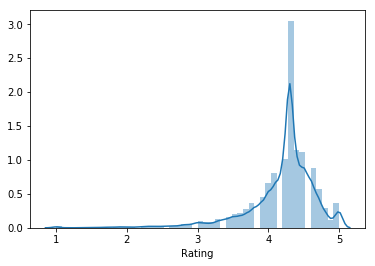

In [147]:
sns.distplot(store['Rating'])

APP 的各分類佔資料集比例

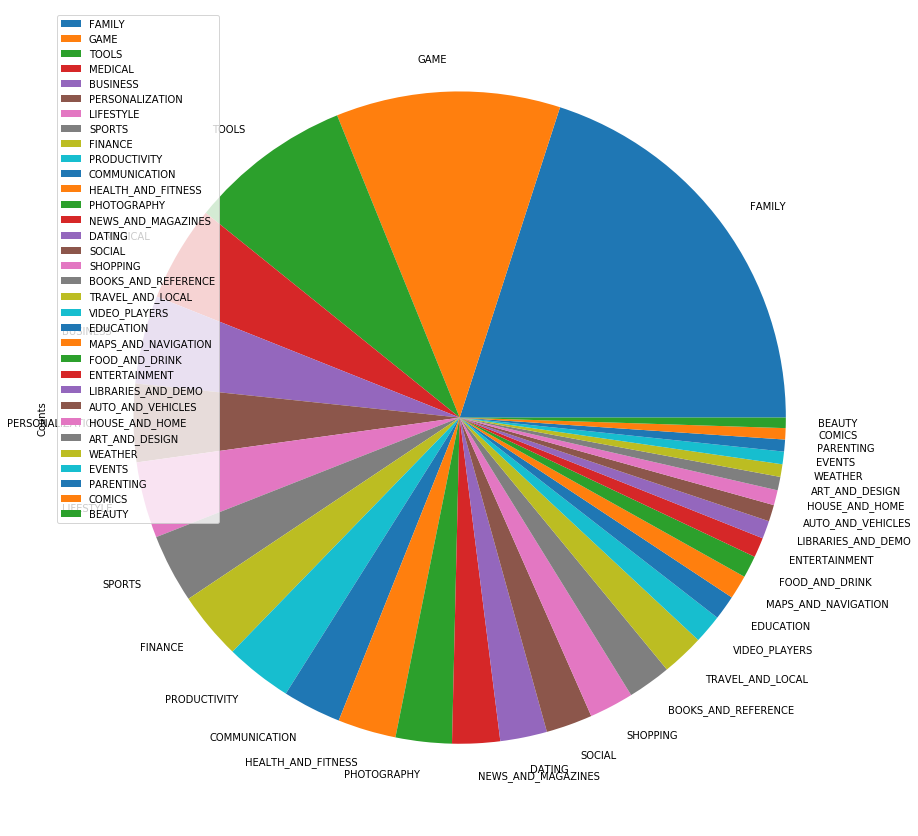

In [148]:
var = store.Category.value_counts()
df = pd.DataFrame({'Counts': var.values}, index=var.index)
plot = df.plot.pie(y='Counts', figsize=(15, 15))

'Rating','Size', 'Installs', 'Reviews', 'Type', 'Price'之間的關係圖

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a d

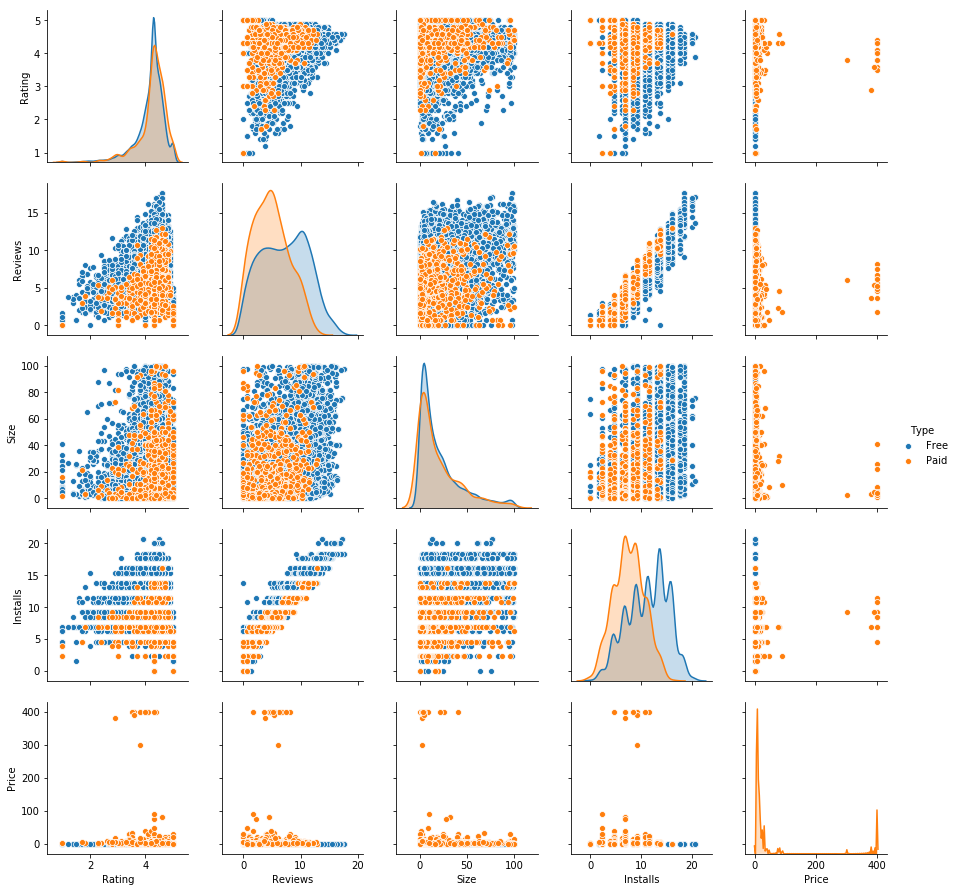

In [149]:
eda = store[['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']]
eda = store[store['Installs'] > 0]
eda = store[store['Reviews'] > 0]

eda['Installs'] = np.log(eda['Installs'])
eda['Reviews'] = np.log(eda['Reviews'])

p = sns.pairplot(eda, hue='Type')

correlation heatmap

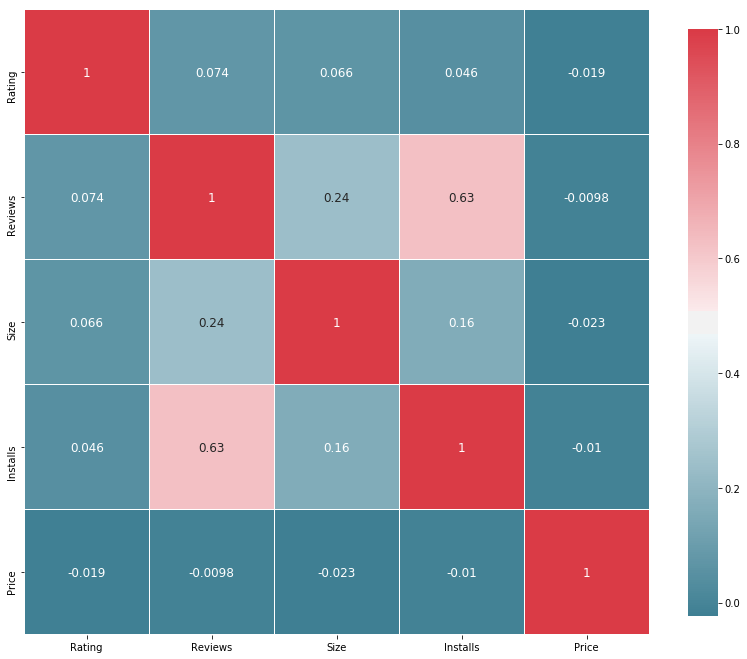

In [150]:
fig , ax = plt.subplots(figsize =(14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
sns.heatmap(store.corr(), cmap = colormap, square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white', annot_kws={'fontsize':12}) 

前十安裝數量APP

In [158]:
best10 = store.groupby("App").mean().sort_values("Installs", ascending = False).head(10)
best10

,Rating,Reviews,Size,Installs,Price
App,,,,,
Google News,3.9,8.777445e+05,13.0,1.000000e+09,0.0
Subway Surfers,4.5,2.772199e+07,76.0,1.000000e+09,0.0
Candy Crush Saga,4.4,2.242759e+07,74.0,5.000000e+08,0.0
Temple Run 2,4.3,8.118488e+06,62.0,5.000000e+08,0.0
Dropbox,4.4,1.861154e+06,61.0,5.000000e+08,0.0
SHAREit - Transfer & Share,4.6,7.782920e+06,17.0,5.000000e+08,0.0
UC Browser - Fast Download Private & Secure,4.5,1.771356e+07,40.0,5.000000e+08,0.0
Pou,4.3,1.048495e+07,24.0,5.000000e+08,0.0
Samsung Health,4.3,4.802080e+05,70.0,5.000000e+08,0.0


匯入評論資料

In [160]:
review = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
review.dropna(axis = 0, inplace = True)
print(review.shape)
review.sample(20)

(37427, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
17270,Box,Great product,Positive,0.800000,0.750000
21989,Calorie Counter - MyFitnessPal,I expect convenience paid app. If set calories...,Negative,-0.297143,0.471429
63448,Hopper - Watch & Book Flights,I got burnt putting trust Hopper predict best ...,Positive,0.158772,0.486842
52670,Garena Free Fire,It good game . Game lagging update -so please ...,Positive,0.075000,0.550000
21634,Calorie Counter & Diet Tracker,Wish features regular site I love anyways! Los...,Positive,0.356250,0.422051
15070,Black People Meet Singles Date,This super fast phone! Love that! It works fas...,Positive,0.302083,0.491667
52408,Garden Coloring Book,This game good,Positive,0.150000,0.500000
35107,Docs To Go™ Free Office Suite,"I new device. I already bought premium key,but...",Positive,0.136364,0.454545
11383,Baby Name Together,A. 99,Neutral,0.000000,0.000000
51046,GANMA! - オリジナル漫画が全話無料で読み放題,"I know might little weird ask but, possible en...",Positive,0.012500,0.700000


Google News App的評論內容

In [161]:
review[review['App'] == "Google News"]['Translated_Review']

56089    I disabled phone. I read lot news wanted try o...
56090    Large photos videos begin automatically. Initi...
56091    Still dark mode especially dark widget? And wo...
56092    The earlier News Weather zillion times better....
56093    I fond newstand prior update. The new ui sure ...
56094    Well, I think looks nice, like others mentione...
56095    Best news yet. The stories relevant interests ...
56096    The brings really interesting news everytime I...
56097    Constantly bombarded irrelevant news celebriti...
56098    Everything fine, EXCEPT stalls Washington Post...
56099    The suggested articles great me. I miss abilit...
56100    I've tried "Hide stories from..." several sour...
56102    Still filling news feed old unwanted articles....
56103    Took good features old news app, cleaned inter...
56104    Considering Google's expertise search algorith...
56105    The design simple yet elegant features, person...
56106    Anyway upgrade previous version Google News ap.

各類型相對於免、付費的Rating's boxplot

[Text(0, 0, 'FAMILY'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'HOUSE_AND_HOME'),
 Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'COMICS'),
 Text(0, 0, 'BEAUTY')]

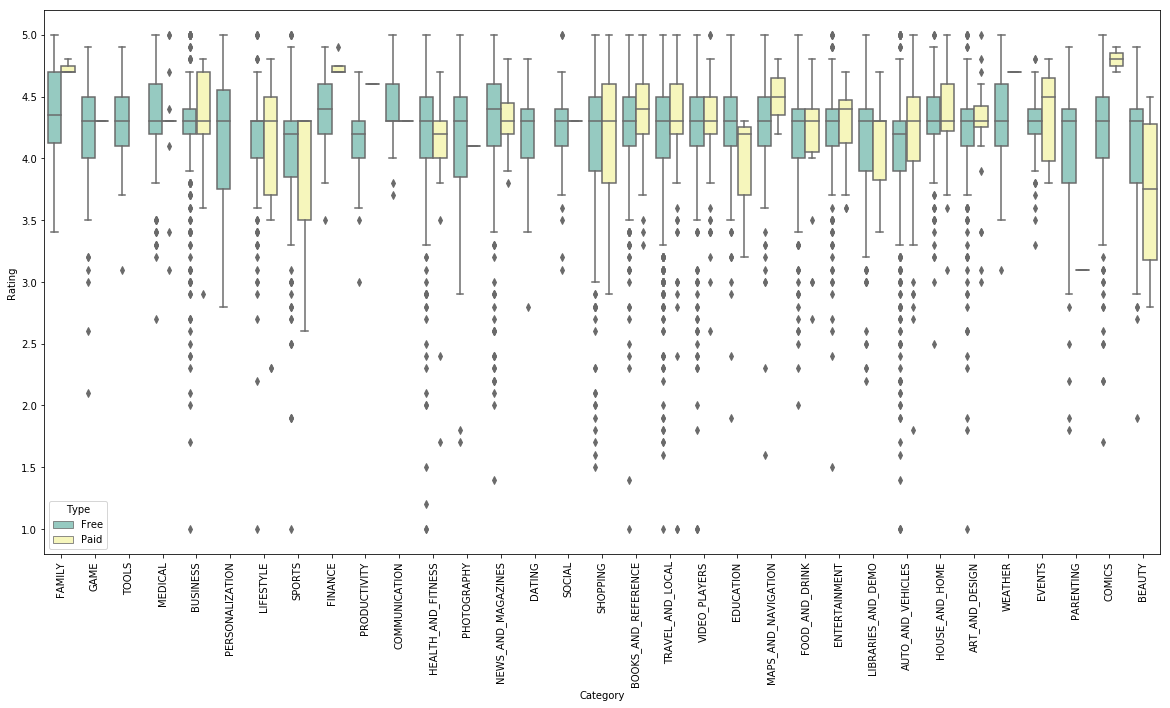

In [169]:
fig, ax = plt.subplots(figsize=(20,10))
g = sns.boxplot("Category", "Rating", hue="Type", data=store, ax=ax, palette="Set3")
g.set_xticklabels(store["Category"].value_counts().index, rotation = 90)